Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/philosopher/2/'

N = 100
M = 100_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:20:39 2025 +0200) (509.51ms ela...,0.2870,0.0000,0.518,2.69,0.06,3.42,65.07 C,Nominal
1,(Tue Apr 15 08:20:39 2025 +0200) (509.21ms ela...,0.1100,0.0314,0.535,2.02,0.07,4.00,65.07 C,Nominal
2,(Tue Apr 15 08:20:40 2025 +0200) (507.60ms ela...,1.1800,0.0000,0.538,3.09,0.22,16.26,64.62 C,Nominal
3,(Tue Apr 15 08:20:40 2025 +0200) (507.39ms ela...,0.0695,0.0000,0.499,1.96,0.04,2.86,64.62 C,Nominal
4,(Tue Apr 15 08:20:41 2025 +0200) (506.90ms ela...,0.0672,0.0000,0.500,1.93,0.04,2.54,64.14 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(116, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:20:51 2025 +0200) (1009.46ms el...,36.0,0.0000,0.989,38.27,3.96,99.27,65.93 C,Nominal
1,(Tue Apr 15 08:20:52 2025 +0200) (1005.21ms el...,34.2,0.0000,0.696,36.44,3.93,98.77,68.99 C,Nominal
2,(Tue Apr 15 08:20:53 2025 +0200) (1005.61ms el...,34.4,0.0000,0.682,36.59,3.89,98.38,71.58 C,Nominal
3,(Tue Apr 15 08:20:54 2025 +0200) (1005.83ms el...,34.4,0.0000,0.665,36.65,3.89,98.05,73.70 C,Nominal
4,(Tue Apr 15 08:20:55 2025 +0200) (1005.03ms el...,35.8,0.0134,0.846,38.14,3.93,98.72,75.91 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:25:15 2025 +0200) (508.59ms ela...,2.730,0.0000,0.576,4.70,0.35,28.89,49.16 C,Nominal
1,(Tue Apr 15 08:25:16 2025 +0200) (508.55ms ela...,0.088,0.0292,0.533,1.99,0.05,3.85,49.16 C,Nominal
2,(Tue Apr 15 08:25:16 2025 +0200) (508.91ms ela...,2.230,0.0000,0.569,4.16,0.39,33.25,49.16 C,Nominal
3,(Tue Apr 15 08:25:17 2025 +0200) (508.68ms ela...,0.056,0.0000,0.499,1.89,0.04,2.62,49.15 C,Nominal
4,(Tue Apr 15 08:25:17 2025 +0200) (508.32ms ela...,1.820,0.0285,0.608,3.75,0.31,20.60,49.15 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(273, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:25:27 2025 +0200) (1006.50ms el...,27.0,0.0000,0.569,29.07,3.41,96.73,52.51 C,Nominal
1,(Tue Apr 15 08:25:28 2025 +0200) (1004.17ms el...,27.0,0.0142,0.596,29.16,3.42,95.29,56.12 C,Nominal
2,(Tue Apr 15 08:25:29 2025 +0200) (1004.05ms el...,30.9,0.0343,0.831,33.14,3.79,98.05,58.81 C,Nominal
3,(Tue Apr 15 08:25:30 2025 +0200) (1004.80ms el...,28.6,0.0000,0.672,30.78,3.72,97.59,61.71 C,Nominal
4,(Tue Apr 15 08:25:31 2025 +0200) (1003.64ms el...,27.5,0.0000,0.545,29.68,3.59,96.41,63.70 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:20:39,0.2870,0.0000,0.518,2.69,0.06,3.42,65.07,Nominal,509.51
1,2025-04-15 08:20:39,0.1100,0.0314,0.535,2.02,0.07,4.00,65.07,Nominal,509.21
2,2025-04-15 08:20:40,1.1800,0.0000,0.538,3.09,0.22,16.26,64.62,Nominal,507.60
3,2025-04-15 08:20:40,0.0695,0.0000,0.499,1.96,0.04,2.86,64.62,Nominal,507.39
4,2025-04-15 08:20:41,0.0672,0.0000,0.500,1.93,0.04,2.54,64.14,Nominal,506.90


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(116, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:20:51,36.0,0.0000,0.989,38.27,3.96,99.27,65.93,Nominal,1009.46
1,2025-04-15 08:20:52,34.2,0.0000,0.696,36.44,3.93,98.77,68.99,Nominal,1005.21
2,2025-04-15 08:20:53,34.4,0.0000,0.682,36.59,3.89,98.38,71.58,Nominal,1005.61
3,2025-04-15 08:20:54,34.4,0.0000,0.665,36.65,3.89,98.05,73.70,Nominal,1005.83
4,2025-04-15 08:20:55,35.8,0.0134,0.846,38.14,3.93,98.72,75.91,Nominal,1005.03


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:25:15,2.730,0.0000,0.576,4.70,0.35,28.89,49.16,Nominal,508.59
1,2025-04-15 08:25:16,0.088,0.0292,0.533,1.99,0.05,3.85,49.16,Nominal,508.55
2,2025-04-15 08:25:16,2.230,0.0000,0.569,4.16,0.39,33.25,49.16,Nominal,508.91
3,2025-04-15 08:25:17,0.056,0.0000,0.499,1.89,0.04,2.62,49.15,Nominal,508.68
4,2025-04-15 08:25:17,1.820,0.0285,0.608,3.75,0.31,20.60,49.15,Nominal,508.32


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(273, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:25:27,27.0,0.0000,0.569,29.07,3.41,96.73,52.51,Nominal,1006.50
1,2025-04-15 08:25:28,27.0,0.0142,0.596,29.16,3.42,95.29,56.12,Nominal,1004.17
2,2025-04-15 08:25:29,30.9,0.0343,0.831,33.14,3.79,98.05,58.81,Nominal,1004.05
3,2025-04-15 08:25:30,28.6,0.0000,0.672,30.78,3.72,97.59,61.71,Nominal,1004.80
4,2025-04-15 08:25:31,27.5,0.0000,0.545,29.68,3.59,96.41,63.70,Nominal,1003.64


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


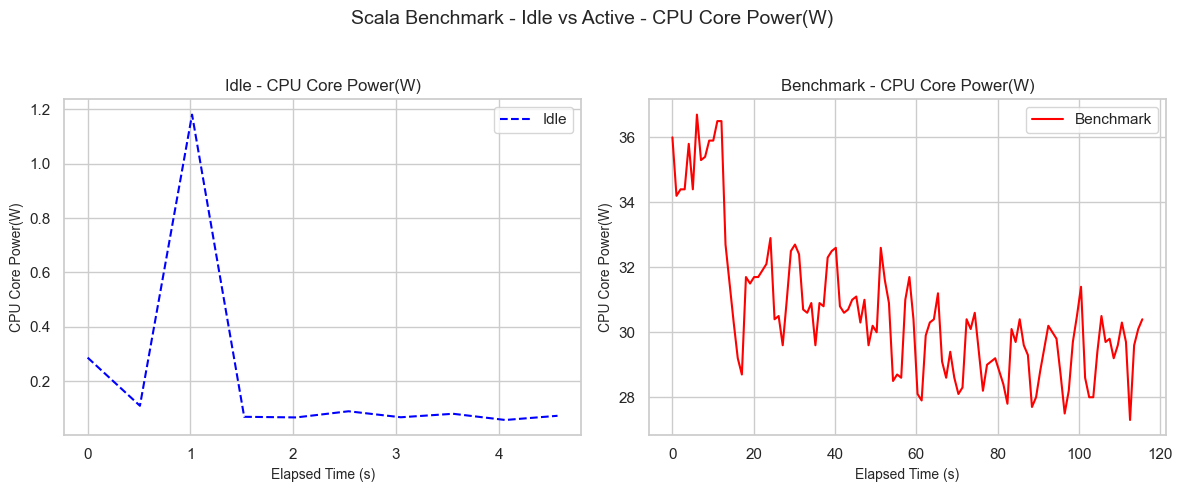

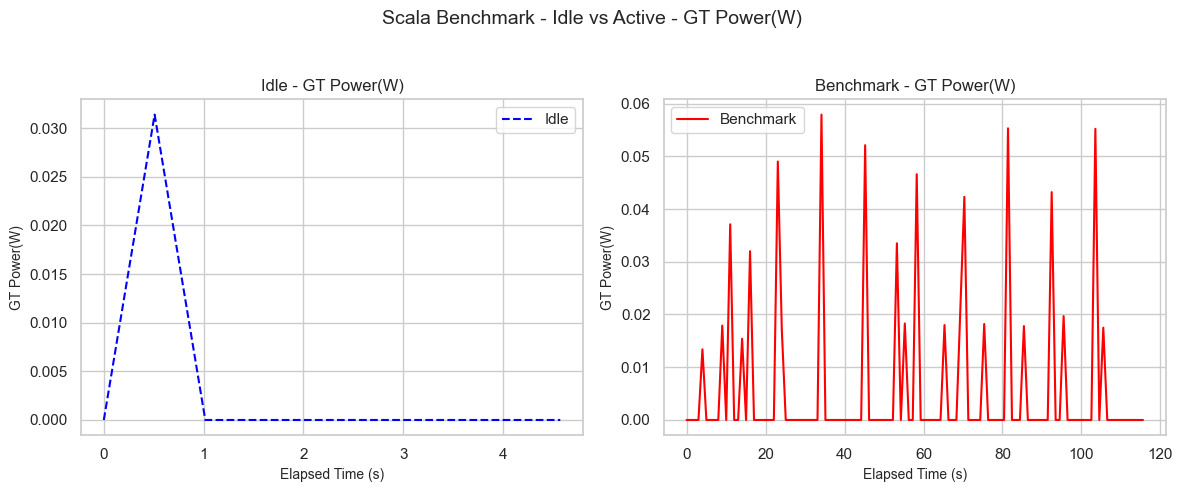

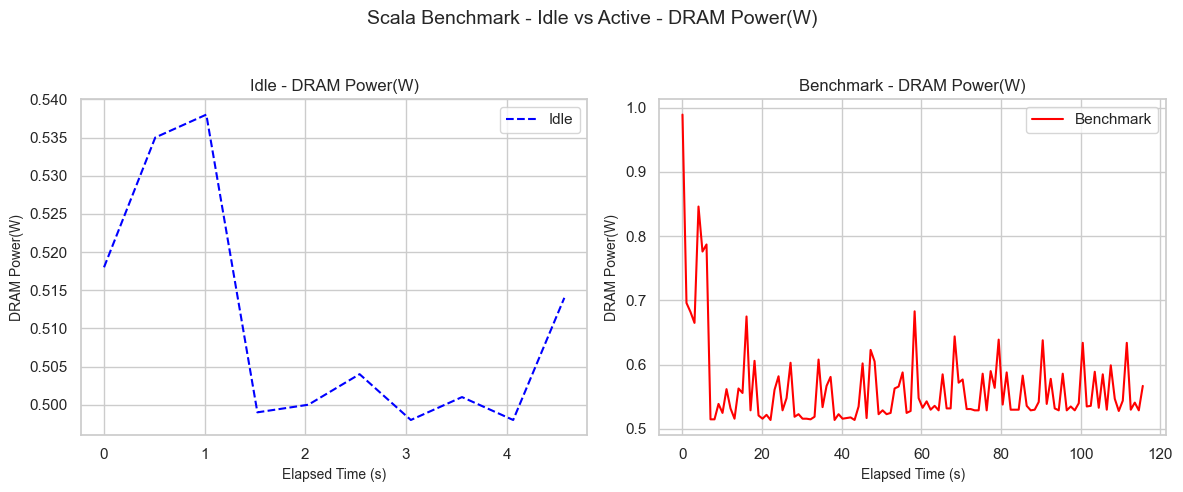

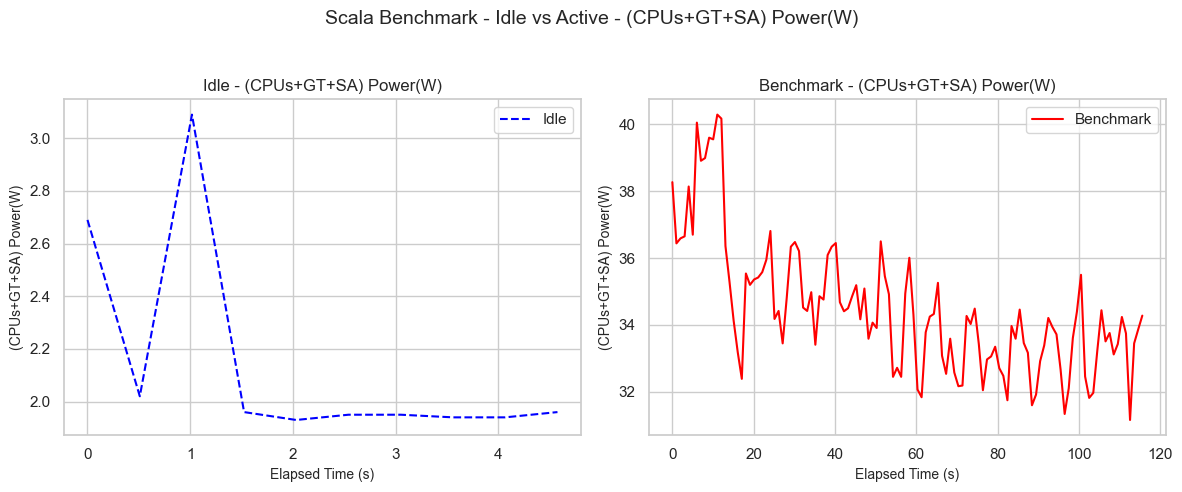

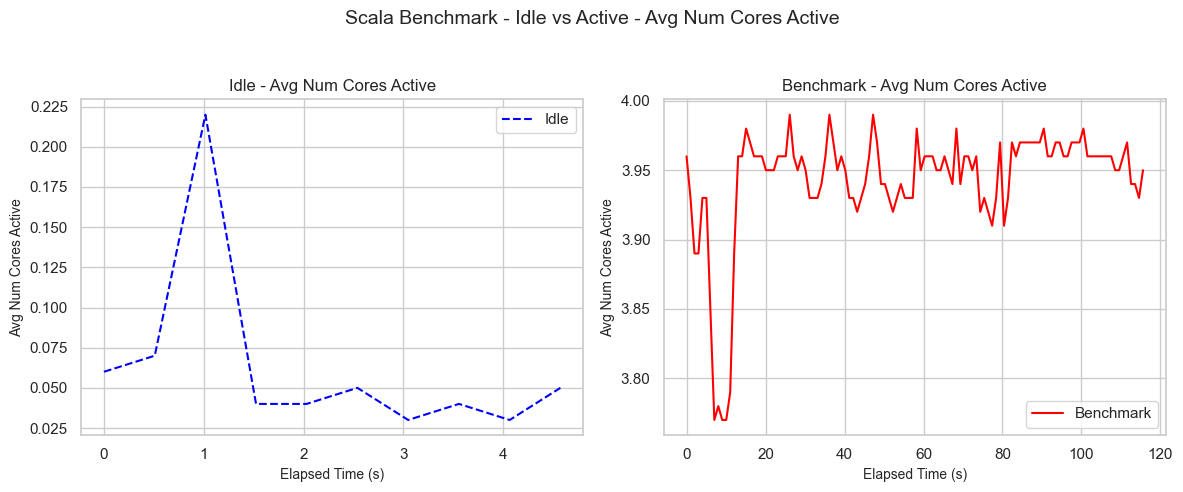

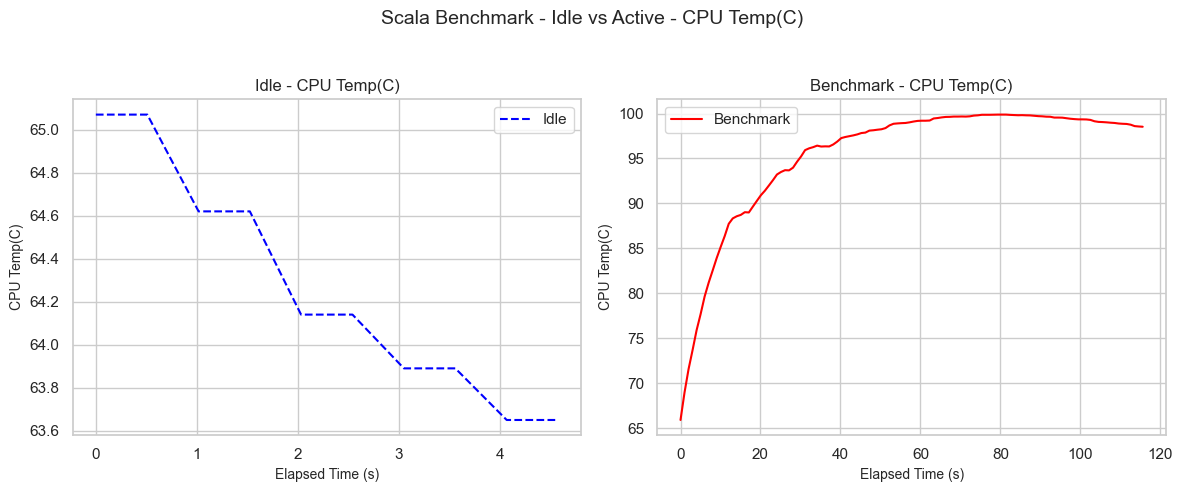

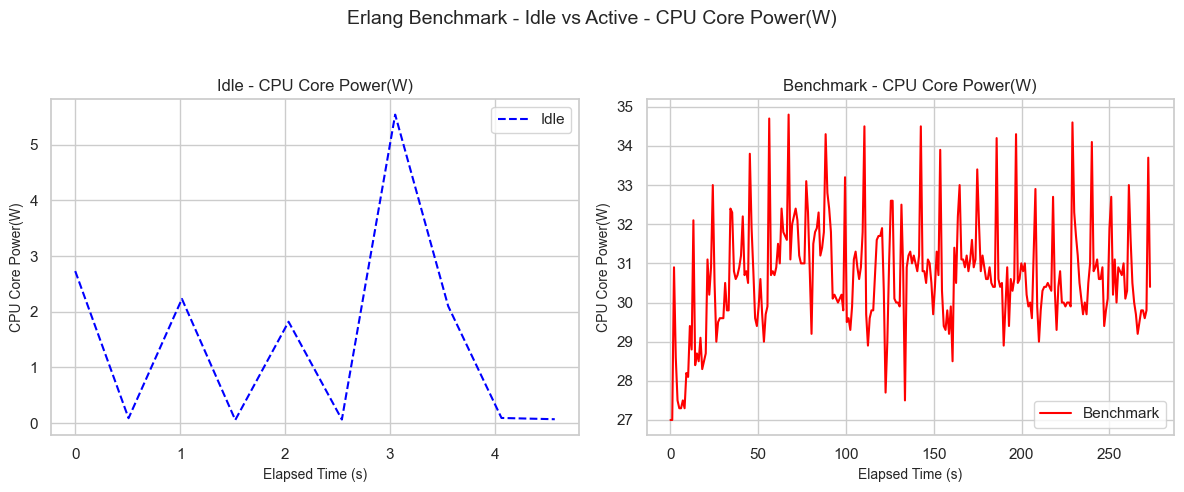

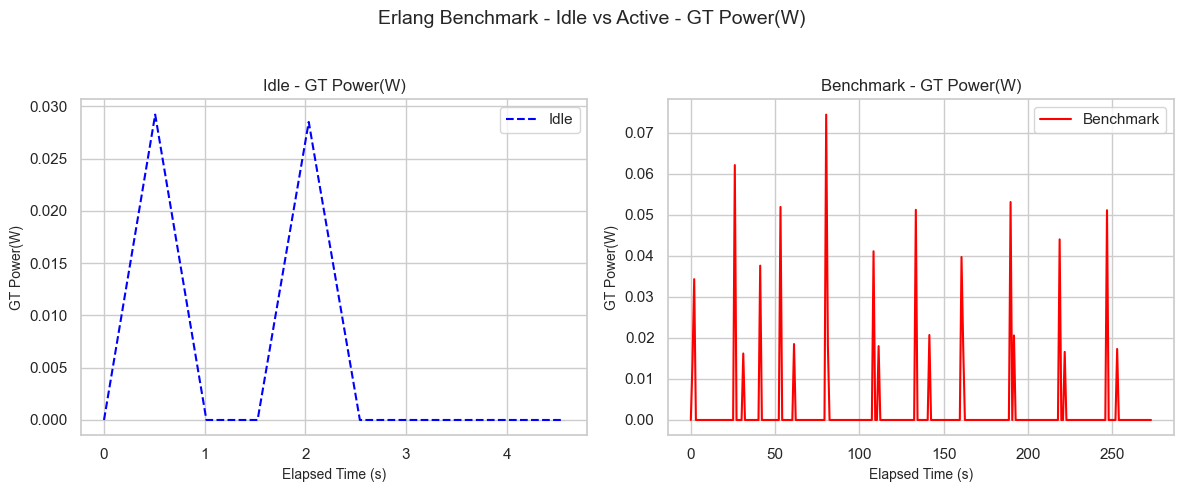

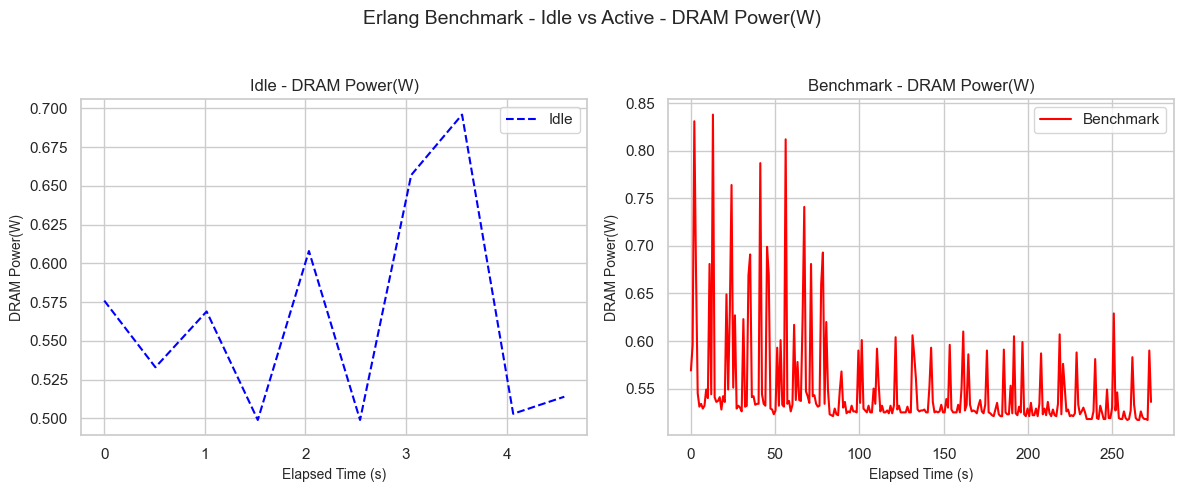

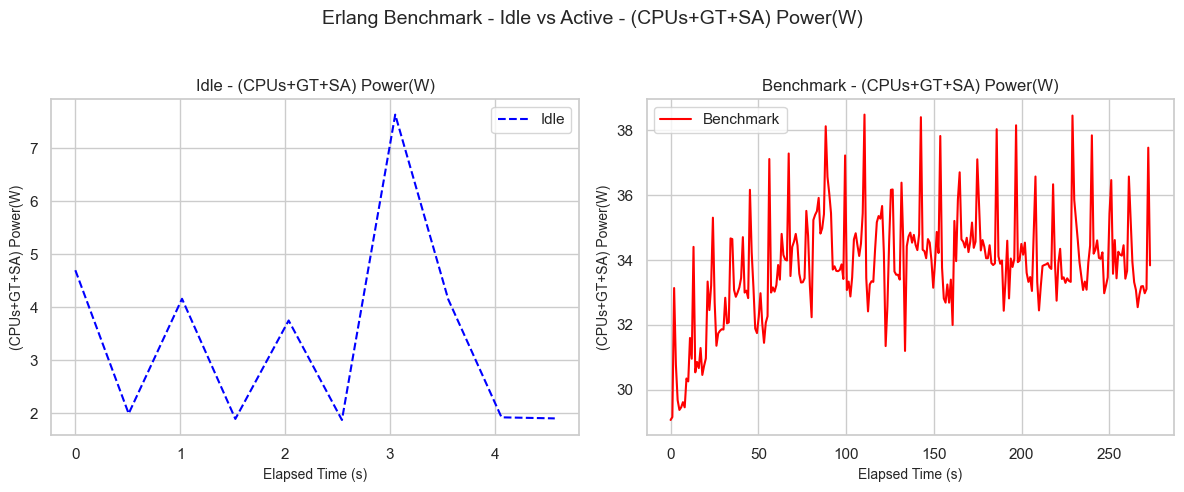

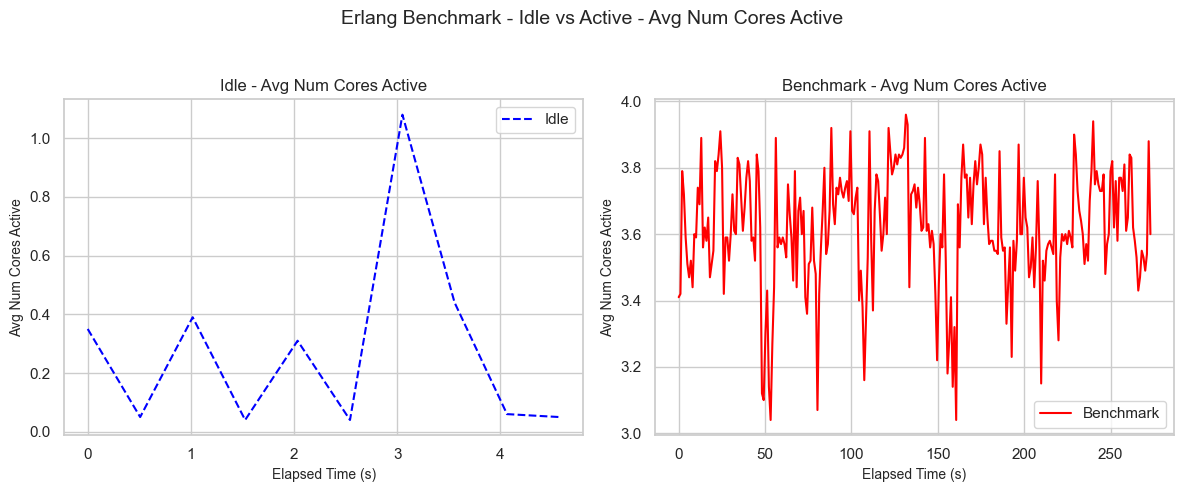

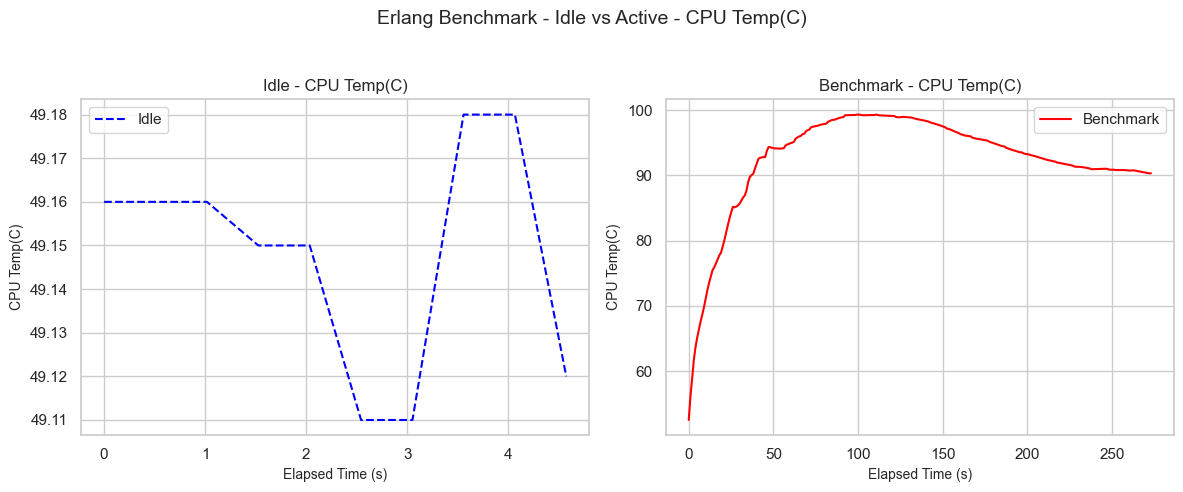

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

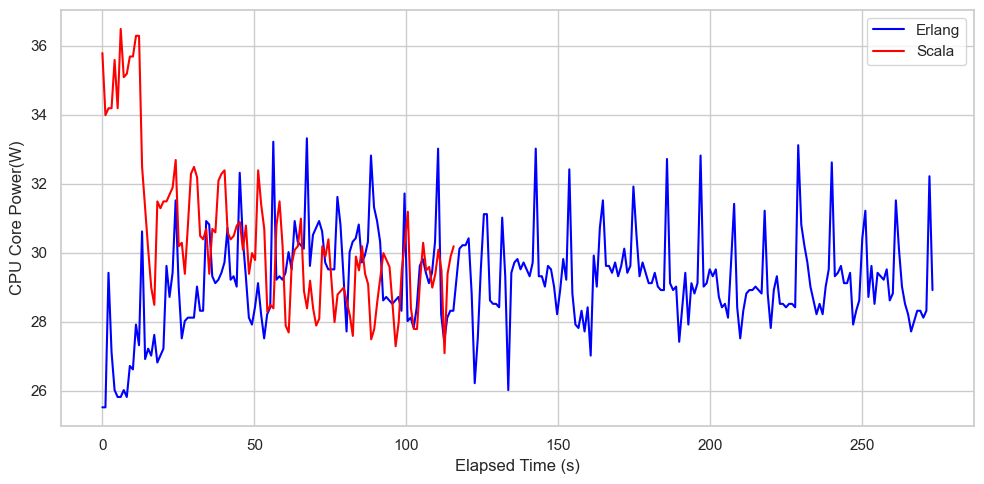

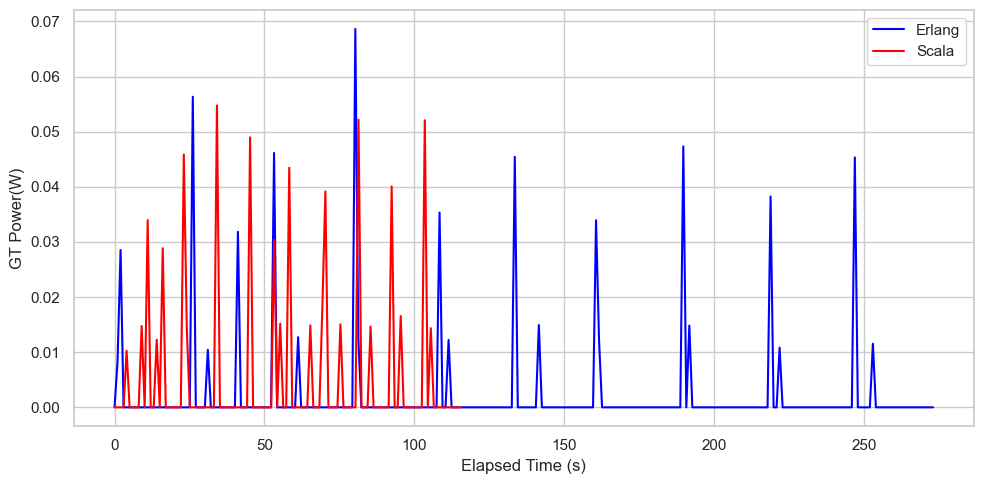

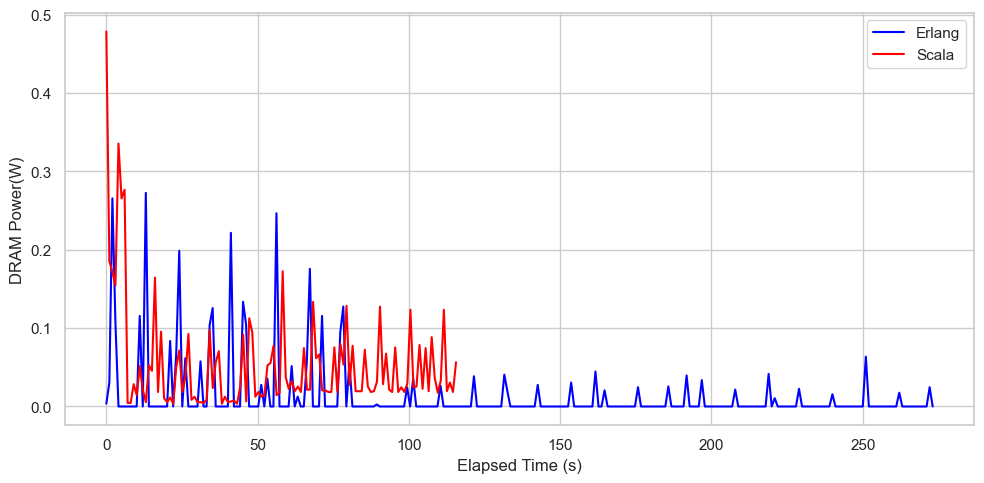

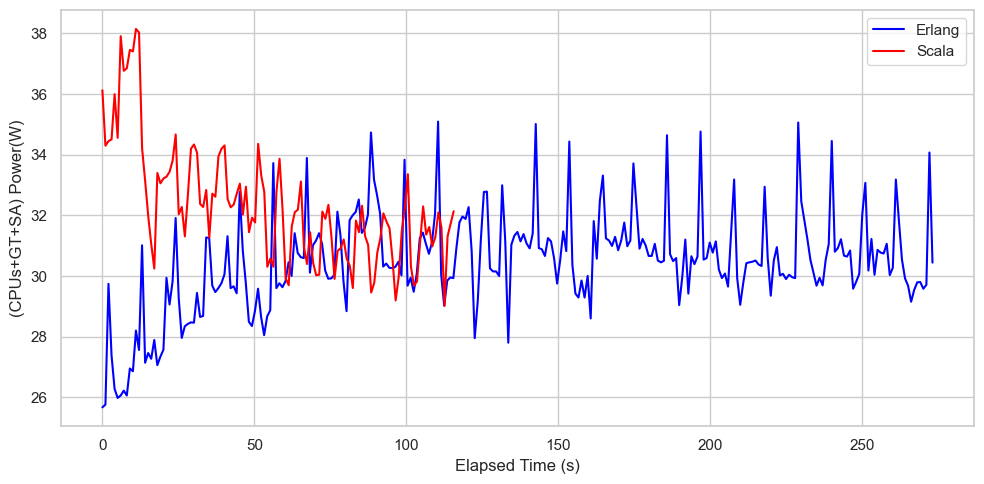

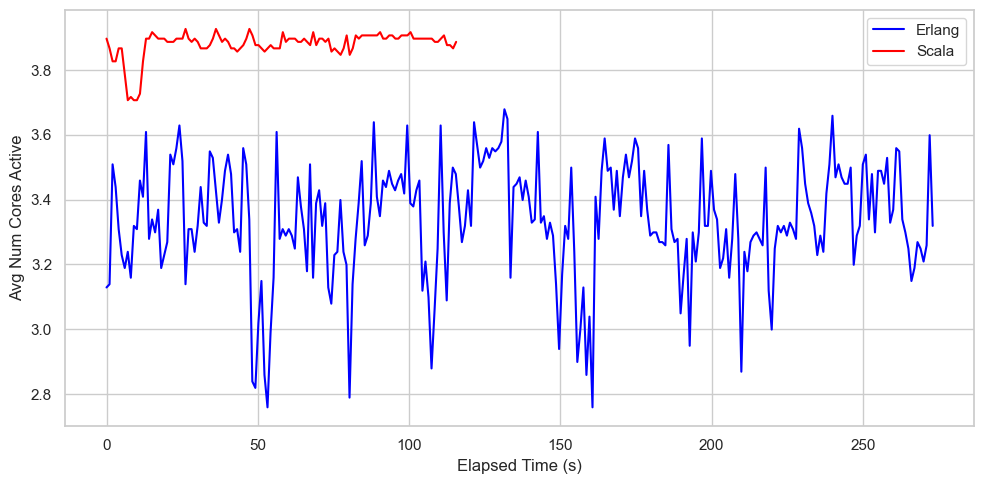

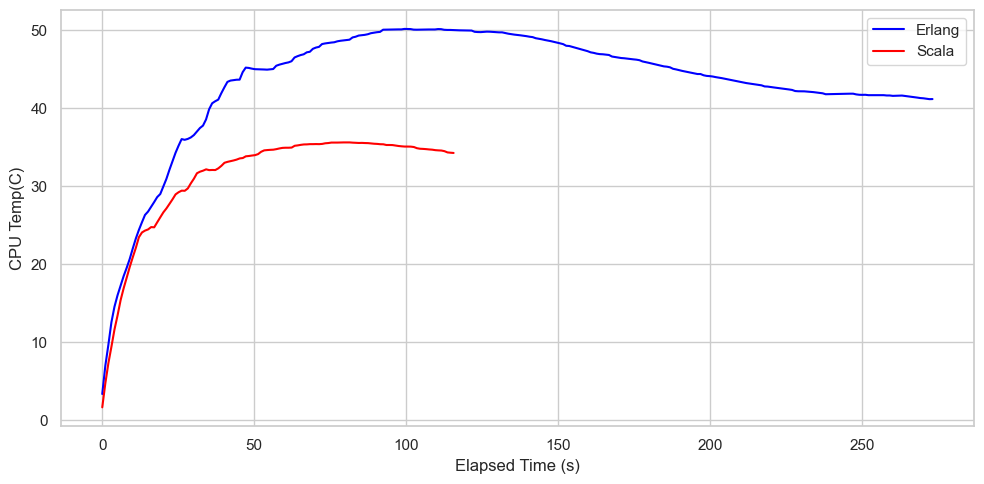

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.453779
GT Power(W)               0.002884
DRAM Power(W)             0.054379
(CPUs+GT+SA) Power(W)    32.324931
CPU Temp(C)              31.167207
Avg Num Cores Active      3.879672
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        29.190241
GT Power(W)              -0.003137
DRAM Power(W)            -0.016312
(CPUs+GT+SA) Power(W)    30.445125
CPU Temp(C)              43.356432
Avg Num Cores Active      3.336436
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 3556.7262095615893 Joules
Erlang Benchmark: 7996.805200803894 Joules
